In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('./data/raw/chips.csv')
print(df.shape)
print(df.head())

(118, 3)
          x        y  class
0  0.051267  0.69956      1
1 -0.092742  0.68494      1
2 -0.213710  0.69225      1
3 -0.375000  0.50219      1
4 -0.513250  0.46564      1


## Decision tree

0.6746987951807228


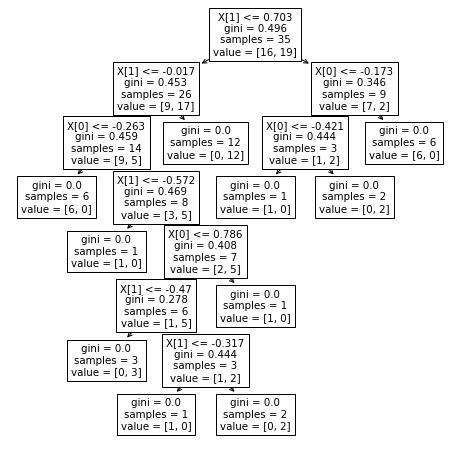

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

x = df[['x', 'y']]
y = df['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7)

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

print(clf.score(x_test, y_test))
plot_tree(clf)
plt.rcParams["figure.figsize"] = (15, 15)
plt.show()

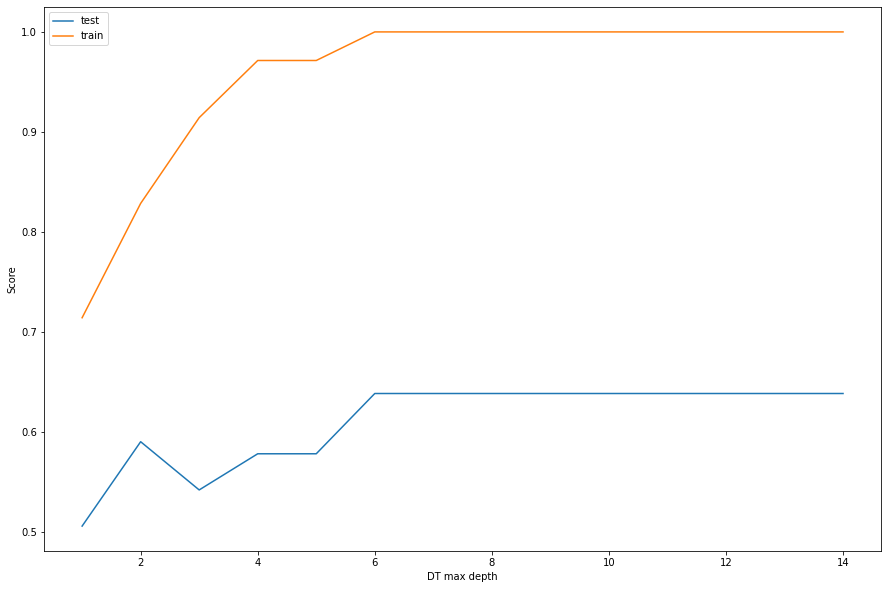

In [5]:
scores_train = []
scores_test = []

for i in range(1, 15):
    clf = DecisionTreeClassifier(max_depth=i, random_state=0)
    clf.fit(x_train, y_train)
    scores_train.append(clf.score(x_train, y_train))

for i in range(1, 15):
    clf = DecisionTreeClassifier(max_depth=i, random_state=0)
    clf.fit(x_train, y_train)
    scores_test.append(clf.score(x_test, y_test))

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(range(1, 15), scores_test, label='test')
ax.plot(range(1, 15), scores_train, label='train')
ax.set_xlabel('DT max depth')
ax.set_ylabel('Score')
ax.legend(loc="upper left")
plt.show()

## Random forest

[1.0, 1.0, 2.0, 3.0, 5.0, 8.0, 13.0, 21.0, 34.0, 55.0, 89.0, 144.0, 233.0, 377.0]


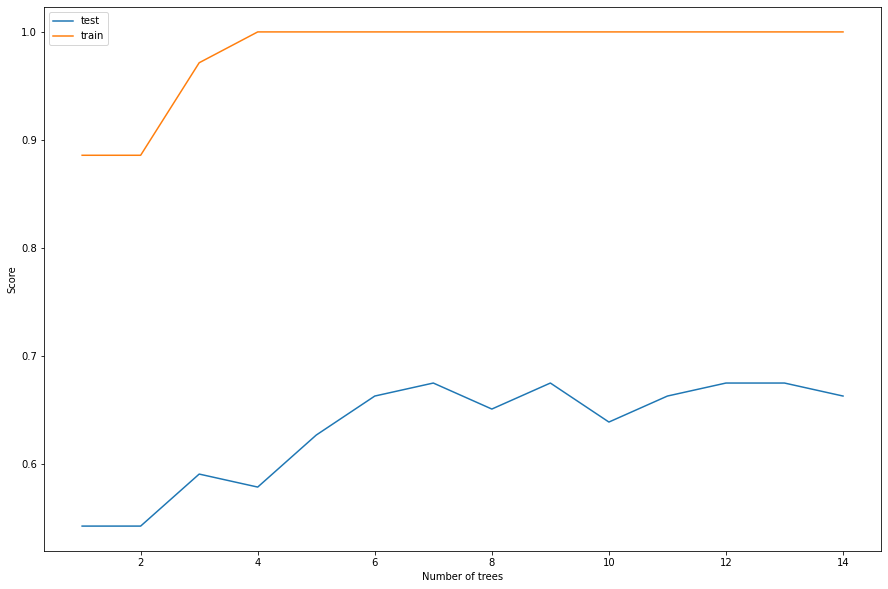

In [6]:
from sklearn.ensemble import RandomForestClassifier

def fib(a: np.array) -> np.array:
    sqrt_five = np.sqrt(5)
    alpha = (1 + sqrt_five) / 2
    beta = (1 - sqrt_five) / 2

    return list(np.rint((alpha ** a - beta ** a) / sqrt_five))

r = np.arange(1, 15)

scores_train = []
scores_test = []

for i in fib(r):
    clf = RandomForestClassifier(n_estimators=int(i), random_state=0)
    clf.fit(x_train, y_train)
    scores_train.append(clf.score(x_train, y_train))

for i in fib(r):
    clf = RandomForestClassifier(n_estimators=int(i), random_state=0)
    clf.fit(x_train, y_train)
    scores_test.append(clf.score(x_test, y_test))

print(fib(r))
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(r, scores_test, label='test')
ax.plot(r, scores_train, label='train')
ax.set_xlabel('Number of trees')
ax.set_ylabel('Score')
ax.legend(loc="upper left")
plt.show()

## AdaBoost

[1.0, 1.0, 2.0, 3.0, 5.0, 8.0, 13.0, 21.0, 34.0, 55.0, 89.0, 144.0, 233.0, 377.0]


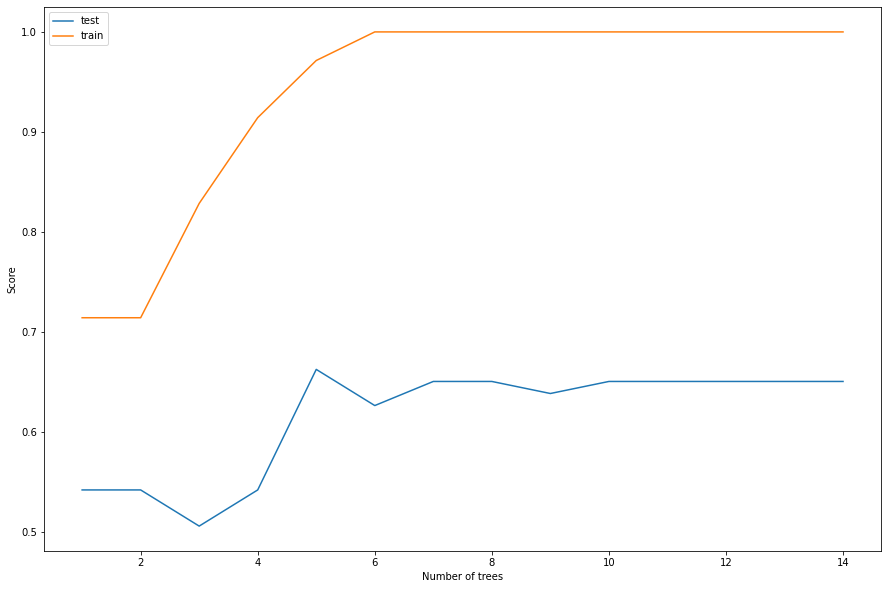

In [7]:
from sklearn.ensemble import AdaBoostClassifier

def fib(a: np.array) -> np.array:
    sqrt_five = np.sqrt(5)
    alpha = (1 + sqrt_five) / 2
    beta = (1 - sqrt_five) / 2

    return list(np.rint((alpha ** a - beta ** a) / sqrt_five))

r = np.arange(1, 15)

scores_train = []
scores_test = []

for i in fib(r):
    clf = AdaBoostClassifier(n_estimators=int(i), random_state=0)
    clf.fit(x_train, y_train)
    scores_train.append(clf.score(x_train, y_train))

for i in fib(r):
    clf = AdaBoostClassifier(n_estimators=int(i), random_state=0)
    clf.fit(x_train, y_train)
    scores_test.append(clf.score(x_test, y_test))

print(fib(r))
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(r, scores_test, label='test')
ax.plot(r, scores_train, label='train')
ax.set_xlabel('Number of trees')
ax.set_ylabel('Score')
ax.legend(loc="upper left")
plt.show()

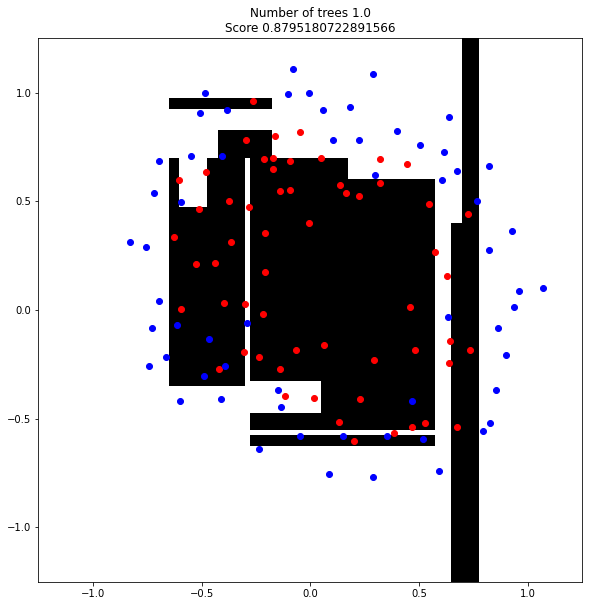

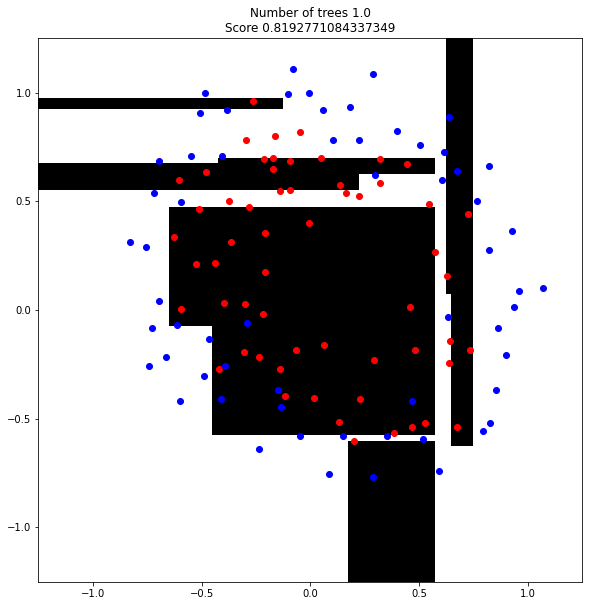

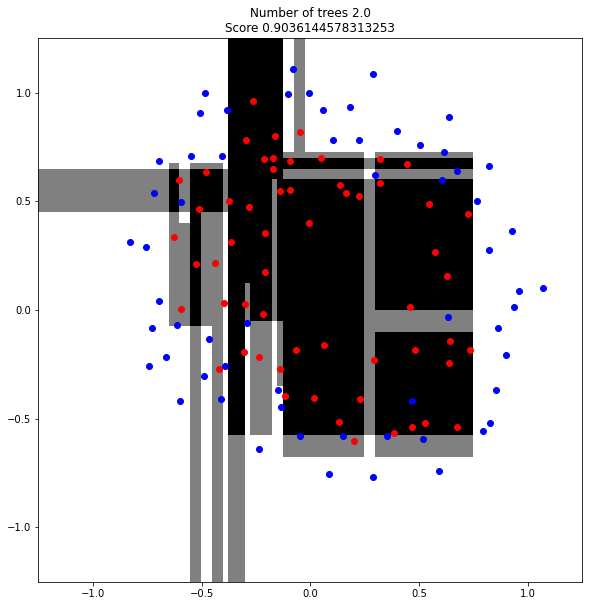

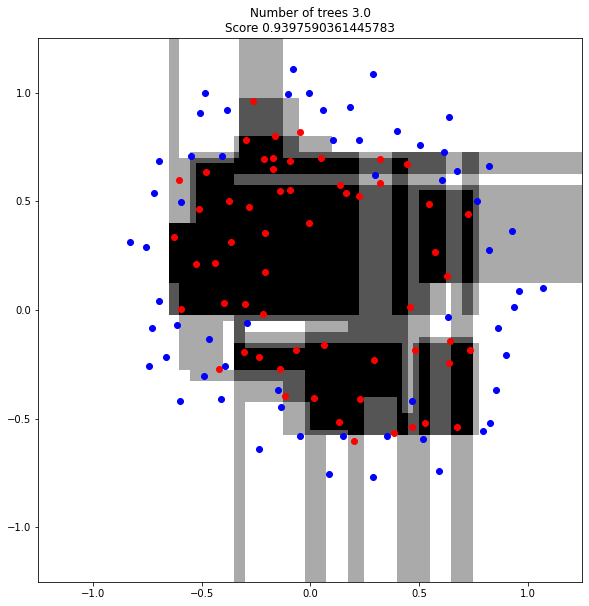

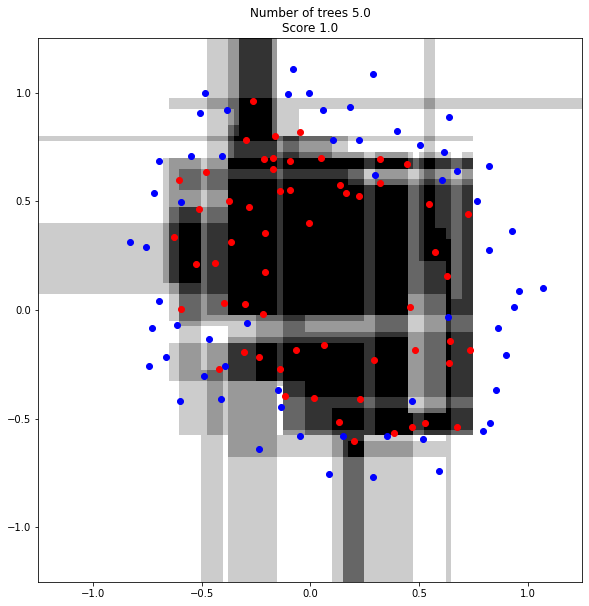

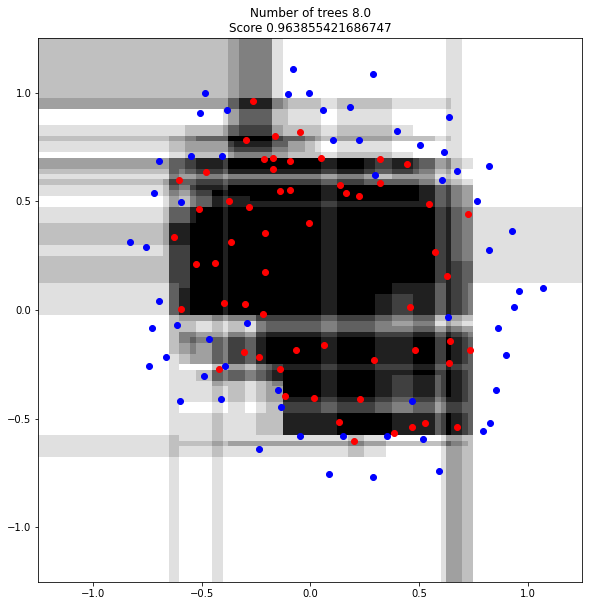

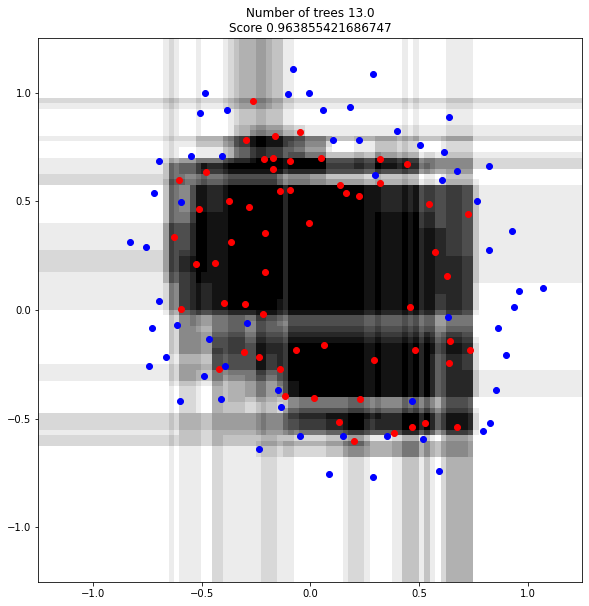

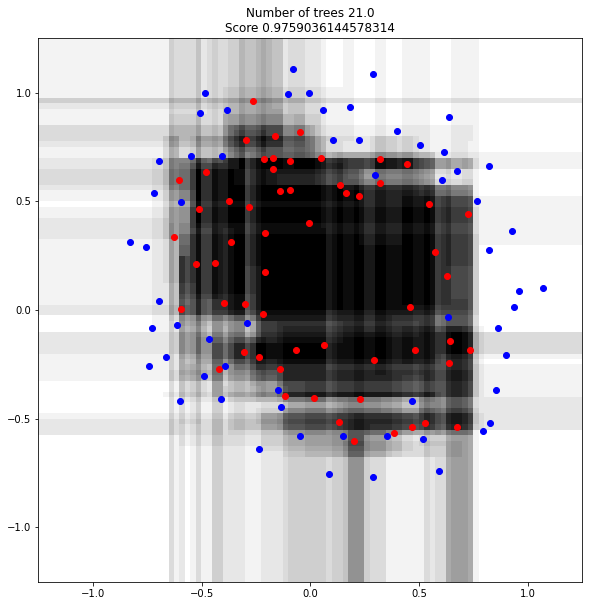

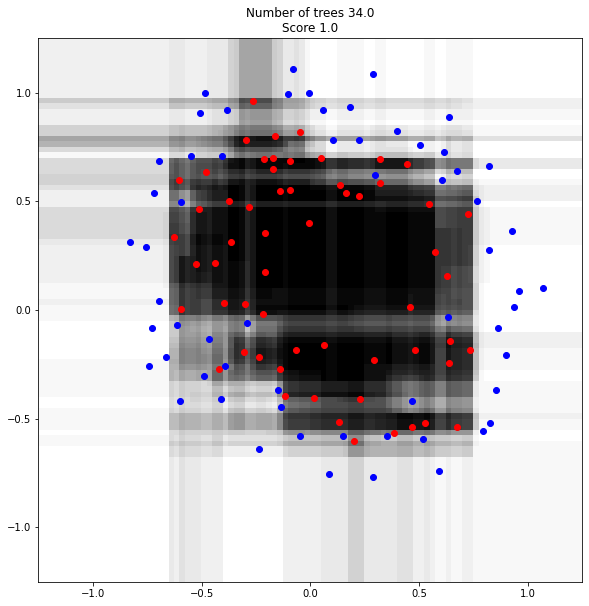

In [8]:
plt.rcParams["figure.figsize"] = (8, 8)

r = np.arange(1, 10)
for i in fib(r):
    clf = RandomForestClassifier(n_estimators=int(i))
    clf.fit(x, y)

    space = np.linspace(-1.25, 1.25, 100)
    grid = pd.DataFrame(np.transpose([np.tile(space, len(space)), np.repeat(space, len(space))]))
    grid = grid.set_axis(['x', 'y'], axis=1, copy=False)

    predicted_proba = clf.predict_proba(grid)[:, 0].reshape((100, 100))
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.imshow(predicted_proba, origin='lower', extent=(-1.25, 1.25, -1.25, 1.25), cmap='gray')

    pos = df[df['class'] == 1]
    neg = df[df['class'] == 0]
    ax.scatter(pos.x, pos.y, color='red')
    ax.scatter(neg.x, neg.y, color='blue')
    ax.title.set_text(f'Number of trees {str(i)}\nScore {clf.score(x_test, y_test)}')

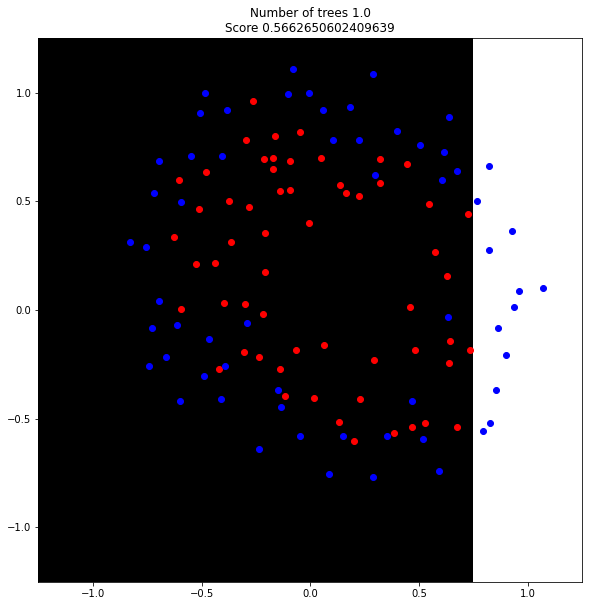

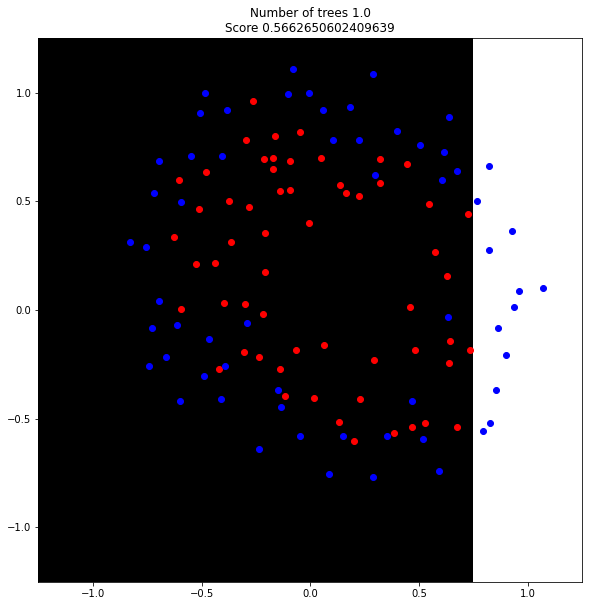

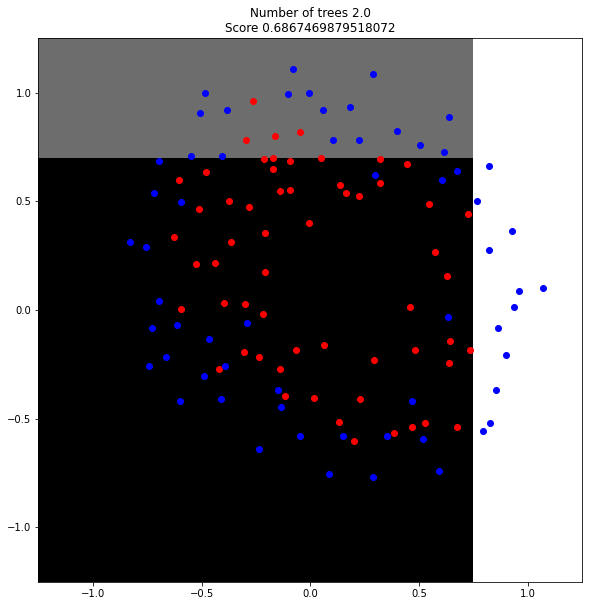

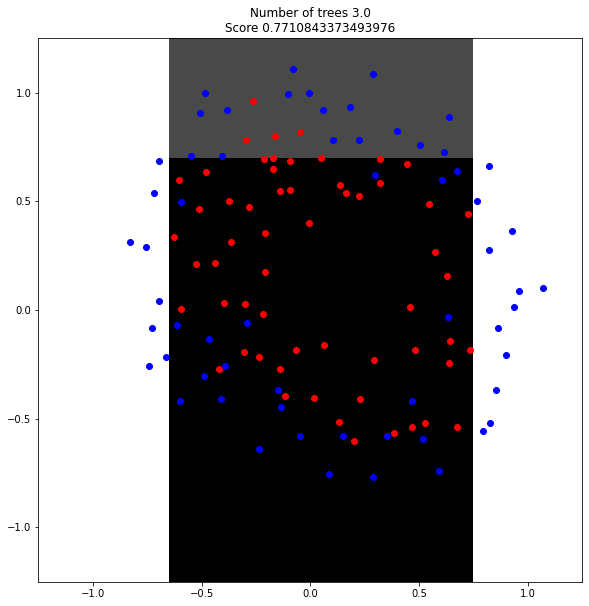

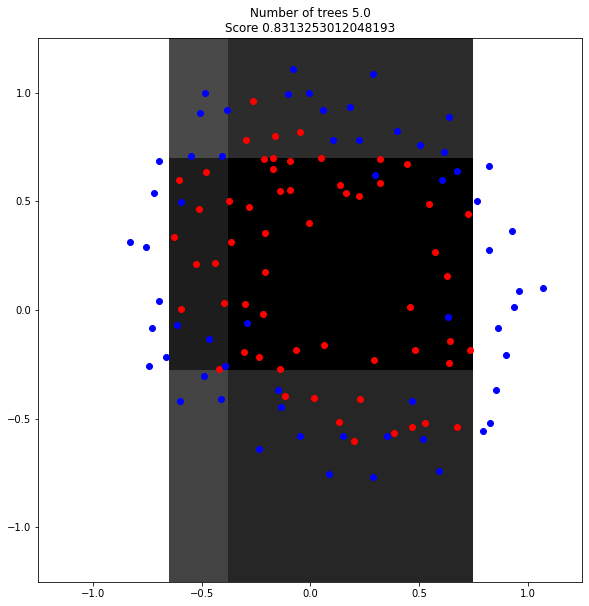

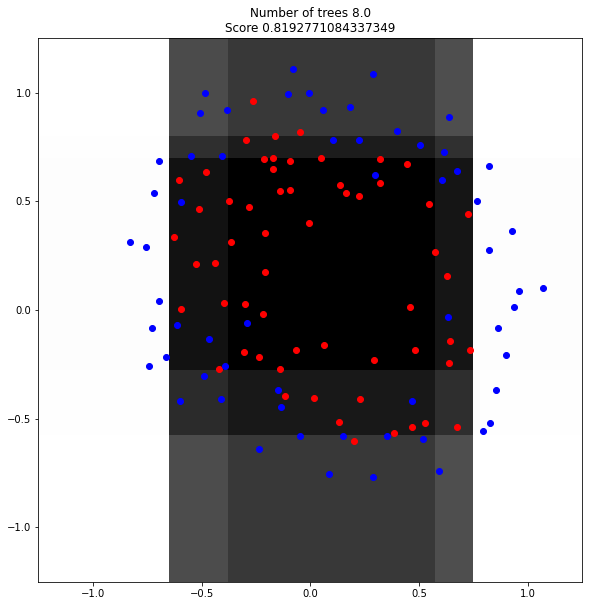

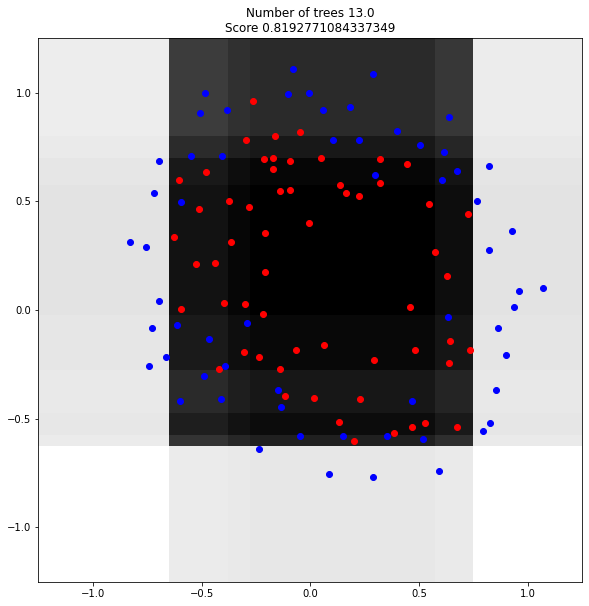

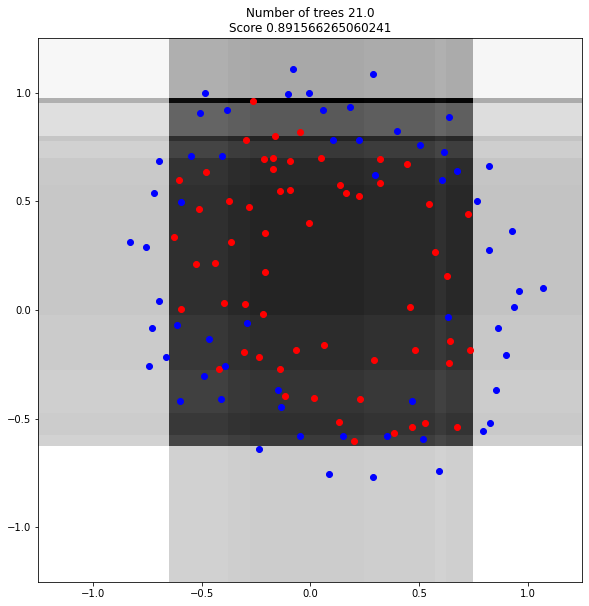

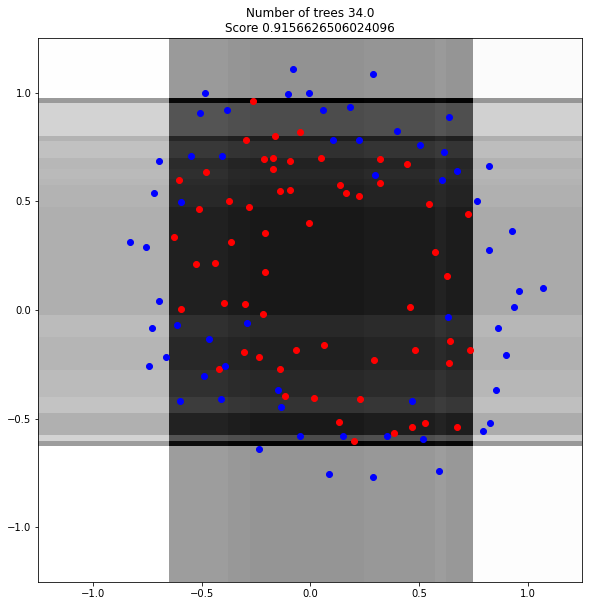

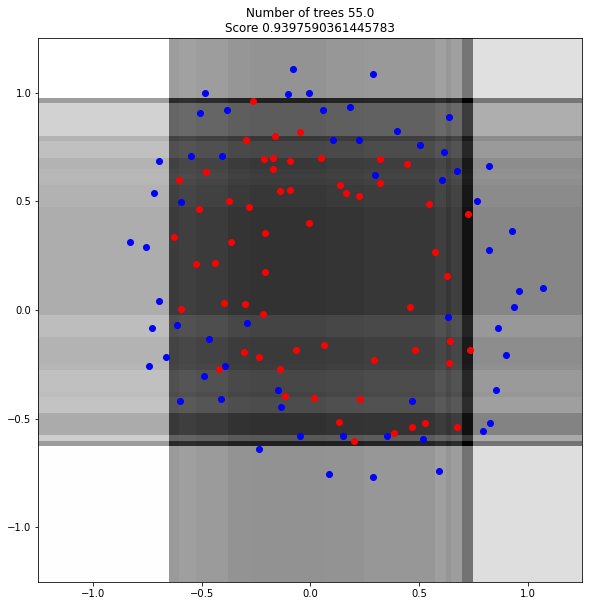

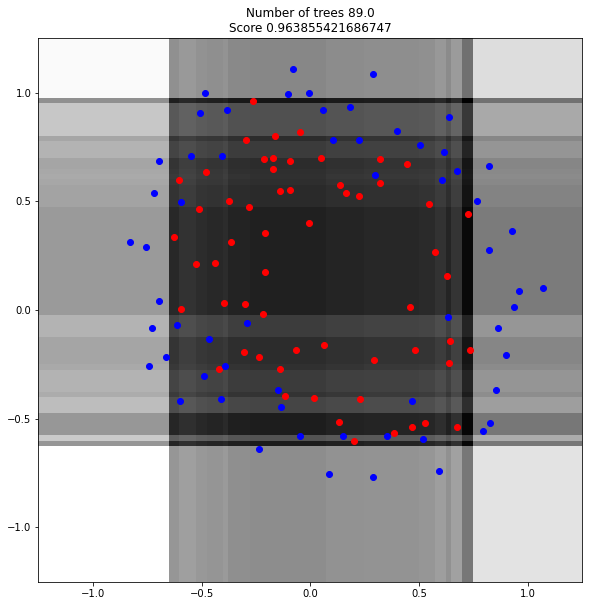

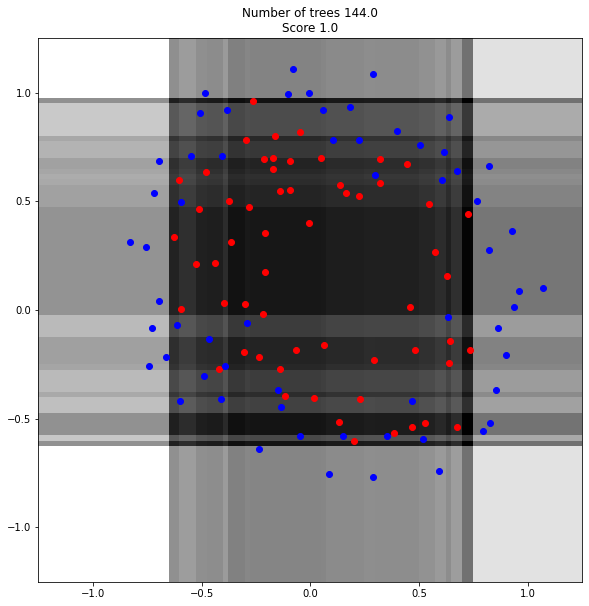

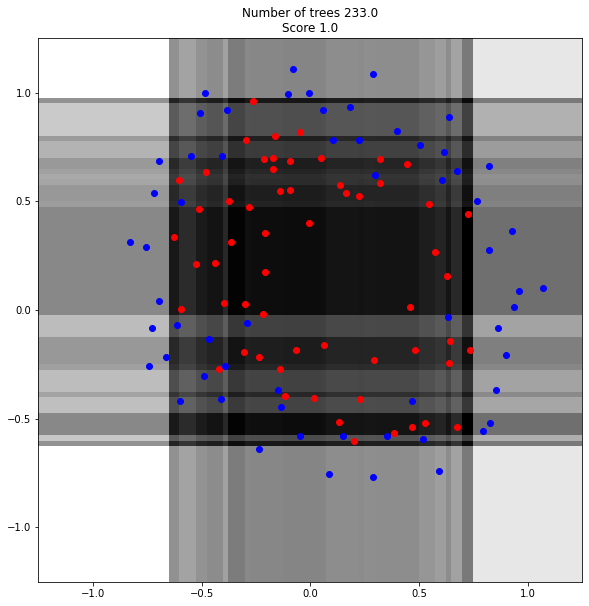

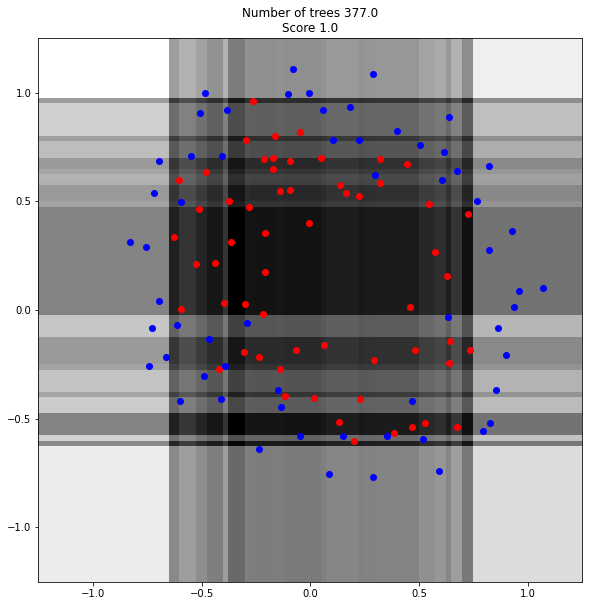

In [9]:
plt.rcParams["figure.figsize"] = (8, 8)

r = np.arange(1, 15)
for i in fib(r):
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, random_state=0), n_estimators=int(i), random_state=0)
    clf.fit(x, y)

    space = np.linspace(-1.25, 1.25, 100)
    grid = pd.DataFrame(np.transpose([np.tile(space, len(space)), np.repeat(space, len(space))]))
    grid = grid.set_axis(['x', 'y'], axis=1, copy=False)

    predicted_proba = clf.predict_proba(grid)[:, 0].reshape((100, 100))
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.imshow(predicted_proba, origin='lower', extent=(-1.25, 1.25, -1.25, 1.25), cmap='gray')

    pos = df[df['class'] == 1]
    neg = df[df['class'] == 0]
    ax.scatter(pos.x, pos.y, color='red')
    ax.scatter(neg.x, neg.y, color='blue')
    ax.title.set_text(f'Number of trees {str(i)}\nScore {clf.score(x_test, y_test)}')